In [1]:
# !pip install transformers
# !pip install tensorflow

Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable


In [2]:
# Get the dataset from
# https://www.kaggle.com/crowdflower/twitter-airline-sentiment


In [3]:
from transformers import pipeline

import numpy as np
import pandas as pd
import seaborn as sn

from sklearn.metrics import roc_auc_score, f1_score, confusion_matrix

In [4]:
# Sentiment analysis transformer pipeline
classifier = pipeline("sentiment-analysis")

No model was supplied, defaulted to distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


Downloading:   0%|          | 0.00/268M [00:00<?, ?B/s]

C:\Users\Uporabnik\AppData\Roaming\Python\Python39\site-packages\huggingface_hub\file_download.py:127: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\Uporabnik\.cache\huggingface\hub. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to see activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)
All model checkpoint layers were used when initializing TFDistilBertForSequenceClassification.

All the layers of TFDistilB

Downloading:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/232k [00:00<?, ?B/s]

In [6]:
classifier("The delay was like forever")

[{'label': 'NEGATIVE', 'score': 0.9935464262962341}]

In [8]:
classifier("Nice, it was an astonishing experience")

[{'label': 'POSITIVE', 'score': 0.999796450138092}]

In [10]:
classifier("I don't know, it was not good, but it was not bad either")

[{'label': 'POSITIVE', 'score': 0.9920228719711304}]

In [12]:
classifier("Nope!")

[{'label': 'NEGATIVE', 'score': 0.9934279322624207}]

In [14]:
df = pd.read_csv('AirlineTweets.csv')

<AxesSubplot:>

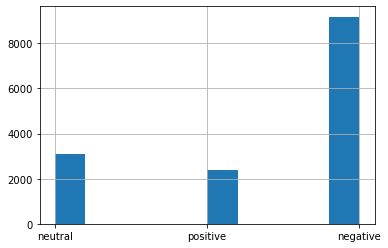

In [18]:
# df = df[df.airline_sentiment != 'neutral'].copy()
target_map = {'positive': 1, 'negative': 0}
df['target'] = df['airline_sentiment'].map(target_map)
df['airline_sentiment'].hist()

In [16]:
texts = df['text'].tolist()
predictions = classifier(texts)
probs = [d['score'] if d['label'].startswith('P') else 1 - d['score'] for d in predictions]


In [19]:
# This code chunk is not mine, I copied it from https://deeplearningcourses.com/c/data-science-transformers-nlp
preds = [1 if d['label'].startswith('P') else 0 for d in predictions]

preds = np.array(preds)
print("acc:", np.mean(df['target'] == preds))
cm = confusion_matrix(df['target'], preds, normalize='true')
cm

# Scikit-Learn is transitioning to V1 but it's not available on Colab
# The changes modify how confusion matrices are plotted
def plot_cm(cm):
  classes = ['negative', 'positive']
  df_cm = pd.DataFrame(cm, index=classes, columns=classes)
  ax = sn.heatmap(df_cm, annot=True, fmt='g')
  ax.set_xlabel("Predicted")
  ax.set_ylabel("Target")

plot_cm(cm)

acc: 0.7015027322404371


ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [ ]:
f1_score(df['target'], preds)

In [ ]:
f1_score(1 - df['target'], 1 - preds)

In [ ]:
roc_auc_score(df['target'], probs)

In [ ]:
roc_auc_score(1 - df['target'], 1 - np.array(probs))